<a href="https://colab.research.google.com/github/GyehyunJo/Olympic/blob/main/Code/TeamOne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 팀 원: 올림픽 기록 분석

## 기본 데이터

In [ ]:
!pip install --upgrade seaborn
!pip install ipywidgets

In [ ]:
# 필요한 라이브러리
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import ipywidgets as widgets
import warnings
from IPython.display import display

# 경고 메시지 무시
warnings.filterwarnings("ignore", category=FutureWarning)

# 데이터 불러오기
csv_path = "athlete_events.csv"

data=pd.read_csv(csv_path)

# 데이터 확인
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
# 데이터 복사하기
fd=data.copy()
df_gender = data.copy()
df_continent = data.copy()
data_ad = data.copy()

In [ ]:
pd.set_option('display.max_rows', None)  # 모든 행 출력
pd.set_option('display.max_columns', None)  # 모든 열 출력

## 대륙별 올릭픽 강세 종목에 대한 분석 및 적용

In [ ]:
# 메달 수상 기록에서 중복된 메달을 제거하는 로직
unique_medals = data.drop_duplicates(subset=['Year', 'Event', 'Season', 'Team', 'Medal'])

# 이렇게 하면 동일한 이벤트에서 한 팀이 받은 메달은 하나만 계산됩니다.
# unique_medals.info()

In [ ]:
# 국가별 코드와 대륙 정보를 딕셔너리로 정리
continent_mapping = {
    'ALG': 'Africa', 'ANG': 'Africa', 'BEN': 'Africa', 'BOT': 'Africa', 'BUR': 'Africa', 'BDI': 'Africa',
    'CMR': 'Africa', 'CPV': 'Africa', 'CAF': 'Africa', 'CHA': 'Africa', 'COM': 'Africa', 'CGO': 'Africa',
    'COD': 'Africa', 'CIV': 'Africa', 'DJI': 'Africa', 'EGY': 'Africa', 'ERI': 'Africa', 'SWZ': 'Africa',
    'ETH': 'Africa', 'GAB': 'Africa', 'GAM': 'Africa', 'GHA': 'Africa', 'GUI': 'Africa', 'GBS': 'Africa',
    'GEQ': 'Africa', 'KEN': 'Africa', 'LES': 'Africa', 'LBR': 'Africa', 'LBA': 'Africa', 'MAD': 'Africa',
    'MAW': 'Africa', 'MLI': 'Africa', 'MAR': 'Africa', 'MRI': 'Africa', 'MTN': 'Africa', 'MOZ': 'Africa',
    'NAM': 'Africa', 'NIG': 'Africa', 'NGR': 'Africa', 'UGA': 'Africa', 'RWA': 'Africa', 'STP': 'Africa',
    'SEN': 'Africa', 'SEY': 'Africa', 'SLE': 'Africa', 'SOM': 'Africa', 'RSA': 'Africa', 'SSD': 'Africa',
    'SUD': 'Africa', 'TAN': 'Africa', 'TOG': 'Africa', 'TUN': 'Africa', 'ZAM': 'Africa', 'ZIM': 'Africa',
    'ANT': 'America', 'ARG': 'America', 'ARU': 'America', 'BAH': 'America', 'BAR': 'America', 'BIZ': 'America',
    'BER': 'America', 'BOL': 'America', 'BRA': 'America', 'CAY': 'America', 'CAN': 'America', 'CHI': 'America',
    'COL': 'America', 'CRC': 'America', 'CUB': 'America', 'DOM': 'America', 'DMA': 'America', 'ESA': 'America',
    'ECU': 'America', 'GRN': 'America', 'GUA': 'America', 'GUY': 'America', 'HAI': 'America', 'HON': 'America',
    'JAM': 'America', 'MEX': 'America', 'NCA': 'America', 'PAN': 'America', 'PAR': 'America', 'PER': 'America',
    'PUR': 'America', 'SKN': 'America', 'LCA': 'America', 'VIN': 'America', 'SUR': 'America', 'TTO': 'America',
    'USA': 'America', 'URU': 'America', 'VEN': 'America', 'IVB': 'America', 'ISV': 'America',
    'AFG': 'Asia', 'BRN': 'Asia', 'BAN': 'Asia', 'BHU': 'Asia', 'BRU': 'Asia', 'CAM': 'Asia', 'CHN': 'Asia',
    'KOR': 'Asia', 'HKG': 'Asia', 'IND': 'Asia', 'INA': 'Asia', 'IRI': 'Asia', 'IRQ': 'Asia', 'JPN': 'Asia',
    'JOR': 'Asia', 'KAZ': 'Asia', 'KGZ': 'Asia', 'KUW': 'Asia', 'LAO': 'Asia', 'LBN': 'Asia', 'MAS': 'Asia',
    'MDV': 'Asia', 'MGL': 'Asia', 'MYA': 'Asia', 'NEP': 'Asia', 'OMA': 'Asia', 'PAK': 'Asia', 'PLE': 'Asia',
    'PHI': 'Asia', 'QAT': 'Asia', 'PRK': 'Asia', 'KSA': 'Asia', 'SGP': 'Asia', 'SRI': 'Asia', 'SYR': 'Asia',
    'TJK': 'Asia', 'TPE': 'Asia', 'THA': 'Asia', 'TLS': 'Asia', 'TKM': 'Asia', 'UAE': 'Asia', 'UZB': 'Asia',
    'VIE': 'Asia', 'YEM': 'Asia',
    'ALB': 'Europe', 'AND': 'Europe', 'ARM': 'Europe', 'AUT': 'Europe', 'AZE': 'Europe', 'BEL': 'Europe',
    'BIH': 'Europe', 'BUL': 'Europe', 'CYP': 'Europe', 'CRO': 'Europe', 'CZE': 'Europe', 'DEN': 'Europe',
    'ESP': 'Europe', 'EST': 'Europe', 'FIN': 'Europe', 'FRA': 'Europe', 'GEO': 'Europe', 'GER': 'Europe',
    'GBR': 'Europe', 'GRE': 'Europe', 'HUN': 'Europe', 'IRL': 'Europe', 'ISL': 'Europe', 'ISR': 'Europe',
    'ITA': 'Europe', 'KOS': 'Europe', 'LAT': 'Europe', 'LIE': 'Europe', 'LTU': 'Europe', 'LUX': 'Europe',
    'MKD': 'Europe', 'MLT': 'Europe', 'MDA': 'Europe', 'MON': 'Europe', 'MNE': 'Europe', 'NED': 'Europe',
    'NOR': 'Europe', 'POL': 'Europe', 'POR': 'Europe', 'ROU': 'Europe', 'SMR': 'Europe', 'SRB': 'Europe',
    'SVK': 'Europe', 'SLO': 'Europe', 'SWE': 'Europe', 'SUI': 'Europe', 'TUR': 'Europe', 'UKR': 'Europe',
    'ASA': 'Oceania', 'AUS': 'Oceania', 'COK': 'Oceania', 'FIJ': 'Oceania', 'GUM': 'Oceania', 'KIR': 'Oceania',
    'MHL': 'Oceania', 'FSM': 'Oceania', 'NRU': 'Oceania', 'NZL': 'Oceania', 'PLW': 'Oceania', 'PNG': 'Oceania',
    'SOL': 'Oceania', 'SAM': 'Oceania', 'TGA': 'Oceania', 'TUV': 'Oceania', 'VAN': 'Oceania'
}

In [ ]:
# 새로운 대륙 컬럼을 추가하고 NOC 코드에 따른 대륙을 매핑
unique_medals['Continent'] = unique_medals['NOC'].map(continent_mapping)

<ipython-input-40-8669630b16f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_medals['Continent'] = unique_medals['NOC'].map(continent_mapping)


In [ ]:
# 개체 연도별 순서별로 저장
df_yearSorted = unique_medals.sort_values(by='Year')
df_yearSorted.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Continent
264039,132122,Vasilios Xydas,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Pole Vault,NaN,Europe
44062,22700,James Brendan Bennet Connolly,M,27.0,175.0,72.0,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's High Jump,Silver,America
213104,107006,Felix Adolf Schmal,M,23.0,NaN,NaN,Austria,AUT,1896 Summer,1896,Summer,Athina,Cycling,Cycling Men's 100 kilometres,NaN,Europe
123037,62185,Georgios Koletis,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Cycling,"Cycling Men's 10,000 metres",NaN,Europe
213103,107006,Felix Adolf Schmal,M,23.0,NaN,NaN,Austria,AUT,1896 Summer,1896,Summer,Athina,Cycling,"Cycling Men's 10,000 metres",Bronze,Europe


In [ ]:
# 최근 1960년 이전 기록 삭제
df_continent = unique_medals[unique_medals['Year']>1960]
df_continent.sort_values(by='Year').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Continent
193921,97343,Levi Psavkin,M,25.0,173.0,76.0,Israel,ISR,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Men's 100 metres,NaN,Europe
103171,52198,Kikuko Inoue (Basugi-),F,39.0,159.0,50.0,Japan,JPN,1964 Summer,1964,Summer,Tokyo,Equestrianism,"Equestrianism Mixed Dressage, Individual",NaN,Asia
86378,43787,Ingrid Gulbin-Engel-Krmer,F,21.0,158.0,56.0,Germany,GER,1964 Summer,1964,Summer,Tokyo,Diving,Diving Women's Springboard,Gold,Europe
86379,43787,Ingrid Gulbin-Engel-Krmer,F,21.0,158.0,56.0,Germany,GER,1964 Summer,1964,Summer,Tokyo,Diving,Diving Women's Platform,Silver,Europe
114338,57903,Marian Krzysztof Kasprzyk,M,25.0,169.0,69.0,Poland,POL,1964 Summer,1964,Summer,Tokyo,Boxing,Boxing Men's Welterweight,Gold,Europe


In [ ]:
# 전체적인 NaN값 확인
df_continent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97794 entries, 0 to 271099
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         97794 non-null  int64  
 1   Name       97794 non-null  object 
 2   Sex        97794 non-null  object 
 3   Age        97262 non-null  float64
 4   Height     92498 non-null  float64
 5   Weight     92401 non-null  float64
 6   Team       97794 non-null  object 
 7   NOC        97794 non-null  object 
 8   Games      97794 non-null  object 
 9   Year       97794 non-null  int64  
 10  Season     97794 non-null  object 
 11  City       97794 non-null  object 
 12  Sport      97794 non-null  object 
 13  Event      97794 non-null  object 
 14  Medal      13081 non-null  object 
 15  Continent  88212 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 12.7+ MB


In [ ]:
# 메달 점수 매핑 딕셔너리 생성
medal_points = {
    'Gold': 3,    # 금메달 3점
    'Silver': 2,  # 은메달 2점
    'Bronze': 1,  # 동메달 1점
    'NA': None  # None 값을 그대로 유지
}

# 'Medal' 컬럼의 값을 점수로 변환하여 'Points' 컬럼에 추가
df_continent['Points'] = df_continent['Medal'].map(medal_points)

df_continent.head(50)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Continent,Points
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,Asia,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,Asia,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Europe,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Europe,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Europe,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Europe,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Europe,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Europe,NaN
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,America,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,America,NaN


In [ ]:
# 같은 대륙과 스포츠 종목을 묶어 그룹으로 묶은후 각 그룹의 Point를 합산
df_total_points = df_continent.groupby(['Continent', 'Sport'])['Points'].sum().reset_index()

# 각 대륙별로 점수 합계가 높은 상위 10개 종목 추출
df_top_10_sports_by_continent = df_total_points.groupby('Continent').apply(lambda x: x.nlargest(10, 'Points')).reset_index(drop=True)
# nlargest(10, 'Points')는 Points 열에서 가장 큰 값을 기준으로 10개의 행을 선택

# 결과 확인
df_top_10_sports_by_continent

<ipython-input-46-21db5d23f48a>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top_10_sports_by_continent = df_total_points.groupby('Continent').apply(lambda x: x.nlargest(10, 'Points')).reset_index(drop=True)


,Continent,Sport,Points
0,Africa,Athletics,452.0
1,Africa,Boxing,52.0
2,Africa,Swimming,52.0
3,Africa,Taekwondo,12.0
4,Africa,Football,10.0
5,Africa,Judo,6.0
6,Africa,Rowing,6.0
7,Africa,Wrestling,6.0
8,Africa,Weightlifting,4.0
9,Africa,Fencing,3.0


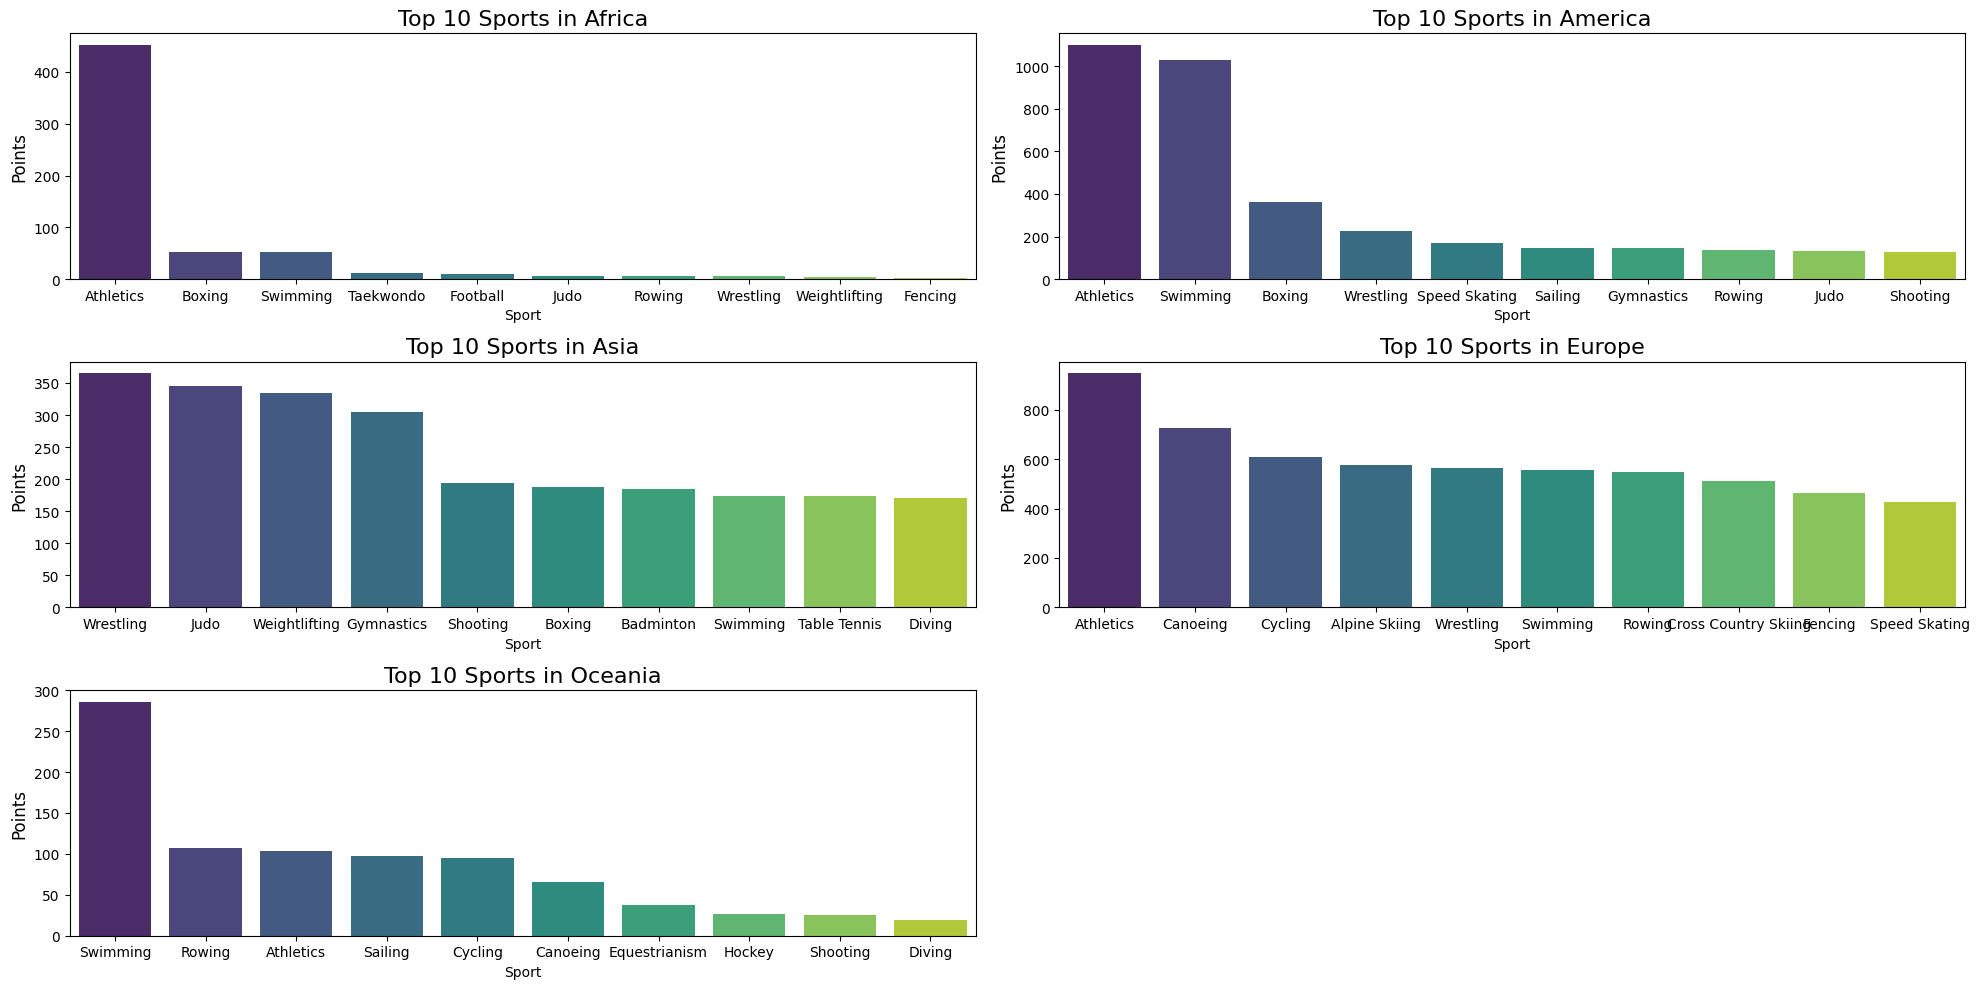

In [ ]:
continents = df_top_10_sports_by_continent['Continent'].unique()

# Figure와 Axes 객체 생성
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))

# 대륙별 그래프 그리기
for i, continent in enumerate(continents):
    # # 행과 열 계산
    row = i // 2
    col = i % 2

    # 해당 대륙의 데이터만 필터링
    df_continent_data = df_top_10_sports_by_continent[df_top_10_sports_by_continent['Continent'] == continent]

    # 그래프 그리기
    sns.barplot(x='Sport', y='Points', data=df_continent_data, palette='viridis', ax=axes[row, col])

    # 그래프 제목과 축 레이블 설정
    axes[row, col].set_title(f'Top 10 Sports in {continent}', fontsize=16)
    axes[row, col].set_xlabel('Sport', fontsize=10)
    axes[row, col].set_ylabel('Points', fontsize=12)

# 빈 subplot을 제거
fig.delaxes(axes[2, 1])

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()

In [ ]:
continent_dropdown = widgets.Dropdown(
    options=df_top_10_sports_by_continent['Continent'].unique(),
    description='Continent:'
)

# 그래프 출력 함수
def plot_graph(continent):
    # 해당 대륙의 데이터만 필터링
    df_continent_data = df_top_10_sports_by_continent[df_top_10_sports_by_continent['Continent'] == continent]

    # 그래프 그리기
    plt.figure(figsize=(20, 5))
    sns.barplot(x='Sport', y='Points', data=df_continent_data, palette='viridis')

    # 그래프 제목과 축 레이블 설정
    plt.title(f'Top 10 Sports in {continent}', fontsize=16)
    plt.xlabel('Sport', fontsize=12)
    plt.ylabel('Points', fontsize=12)

    # 그래프 보여주기
    plt.show()

# 위젯과 그래프 출력 함수 연결
widgets.interactive(plot_graph, continent=continent_dropdown)

interactive(children=(Dropdown(description='Continent:', options=('Africa', 'America', 'Asia', 'Europe', 'Ocea…

### 대륙별 올릭픽 강세 종목에 대한 분석 및 적용

* 종목별 훈련 프로그램 개발: 강세 종목에서의 성과를 유지하면서도 약한 종목에서 성과를 내기 위한 훈련 전략을 마련

* 메달 획득 예측 및 전략: 올림픽이나 세계 선수권 대회에서 각 국가 또는 대륙의 메달 획득 가능성을 예측. 이를 통해 국가별 메달 목표 설정

* 스포츠 과학 연구: 각 대륙별 강세 종목에서 신체적 특성이나 훈련 방법을 연구함으로써, 성과를 높이는 과학적 접근법을 개발

* 인기 스포츠 마케팅 : 각 대륙에서 인기 있는 스포츠에 대한 정보를 활용해 스포츠 마케팅에 활용

---

## 미국과 아시아의 성별당 **매달 종류 분포도** 비교

In [ ]:
# 국가별 코드와 북미, 아시아 정보를 딕셔너리로 정리
continent_map = {
    'USA': 'America','AFG': 'Asia', 'BRN': 'Asia', 'BAN': 'Asia', 'BHU': 'Asia', 'BRU': 'Asia', 'CAM': 'Asia', 'CHN': 'Asia',
    'KOR': 'Asia', 'HKG': 'Asia', 'IND': 'Asia', 'INA': 'Asia', 'IRI': 'Asia', 'IRQ': 'Asia', 'JPN': 'Asia',
    'JOR': 'Asia', 'KAZ': 'Asia', 'KGZ': 'Asia', 'KUW': 'Asia', 'LAO': 'Asia', 'LBN': 'Asia', 'MAS': 'Asia',
    'MDV': 'Asia', 'MGL': 'Asia', 'MYA': 'Asia', 'NEP': 'Asia', 'OMA': 'Asia', 'PAK': 'Asia', 'PLE': 'Asia',
    'PHI': 'Asia', 'QAT': 'Asia', 'PRK': 'Asia', 'KSA': 'Asia', 'SGP': 'Asia', 'SRI': 'Asia', 'SYR': 'Asia',
    'TJK': 'Asia', 'TPE': 'Asia', 'THA': 'Asia', 'TLS': 'Asia', 'TKM': 'Asia', 'UAE': 'Asia', 'UZB': 'Asia',
    'VIE': 'Asia', 'YEM': 'Asia'
}

In [ ]:
# 새로운 대륙 컬럼을 추가하고 NOC 코드에 따른 대륙을 매핑
df_gender['Continent'] = df_gender['NOC'].map(continent_map)

df_gender.head() #Continent 가 추가됬는지 확인

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Continent
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,Asia
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,Asia
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,NaN


In [ ]:
df_gender['Medal'].value_counts(dropna= False) #메달 확인

,count
Medal,
NaN,231333
Gold,13372
Bronze,13295
Silver,13116


In [ ]:
df_gender.isnull().sum()#성별과 Medal에 결측치없을을확인 Medal에서 NaN 메달 못딴 사람

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


In [ ]:
# 메달 획득에 대한 데이터 필터링 (메달을 받은 경우만 선택)
df_medals = df_gender.dropna(subset=['Medal'])
df_medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Continent
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,NaN
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,NaN
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,NaN
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,NaN


In [ ]:
# 미국과 아시아 국가만 필터링
df_filtered = df_medals[(df_medals['NOC'] == 'USA') | (df_medals['Continent'] == 'Asia')]
df_filtered['Continent'].unique()     #필터링 확인

array(['America', 'Asia'], dtype=object)

In [ ]:
# 성별에 따른 메달 획득 수를 그룹화
gender_medal_distribution = df_filtered.groupby(['Continent', 'Sex', 'Medal']).size().reset_index(name='Counts')
gender_medal_distribution   #그룹 확인

,Continent,Sex,Medal,Counts
0,America,F,Bronze,419
1,America,F,Gold,852
2,America,F,Silver,534
3,America,M,Bronze,939
4,America,M,Gold,1786
5,America,M,Silver,1107
6,Asia,F,Bronze,453
7,Asia,F,Gold,416
8,Asia,F,Silver,517
9,Asia,M,Bronze,664


In [ ]:
total_medals = df_filtered.groupby(['Continent', 'Sex']).size().reset_index(name='Total_Medals') #총 메달 수 계산
total_medals

,Continent,Sex,Total_Medals
0,America,F,1805
1,America,M,3832
2,Asia,F,1386
3,Asia,M,1942


In [ ]:
df_merged = pd.merge(gender_medal_distribution, total_medals, on=['Continent', 'Sex']) # 데이터병합
df_merged

,Continent,Sex,Medal,Counts,Total_Medals
0,America,F,Bronze,419,1805
1,America,F,Gold,852,1805
2,America,F,Silver,534,1805
3,America,M,Bronze,939,3832
4,America,M,Gold,1786,3832
5,America,M,Silver,1107,3832
6,Asia,F,Bronze,453,1386
7,Asia,F,Gold,416,1386
8,Asia,F,Silver,517,1386
9,Asia,M,Bronze,664,1942


In [ ]:
df_merged['Medal_Rate'] = df_merged['Counts'] / df_merged['Total_Medals'] * 100   #메달획득비율 계산후  추가
df_merged  #메달 획득률 확인

,Continent,Sex,Medal,Counts,Total_Medals,Medal_Rate
0,America,F,Bronze,419,1805,23.213296
1,America,F,Gold,852,1805,47.202216
2,America,F,Silver,534,1805,29.584488
3,America,M,Bronze,939,3832,24.504175
4,America,M,Gold,1786,3832,46.607516
5,America,M,Silver,1107,3832,28.888309
6,Asia,F,Bronze,453,1386,32.683983
7,Asia,F,Gold,416,1386,30.014430
8,Asia,F,Silver,517,1386,37.301587
9,Asia,M,Bronze,664,1942,34.191555


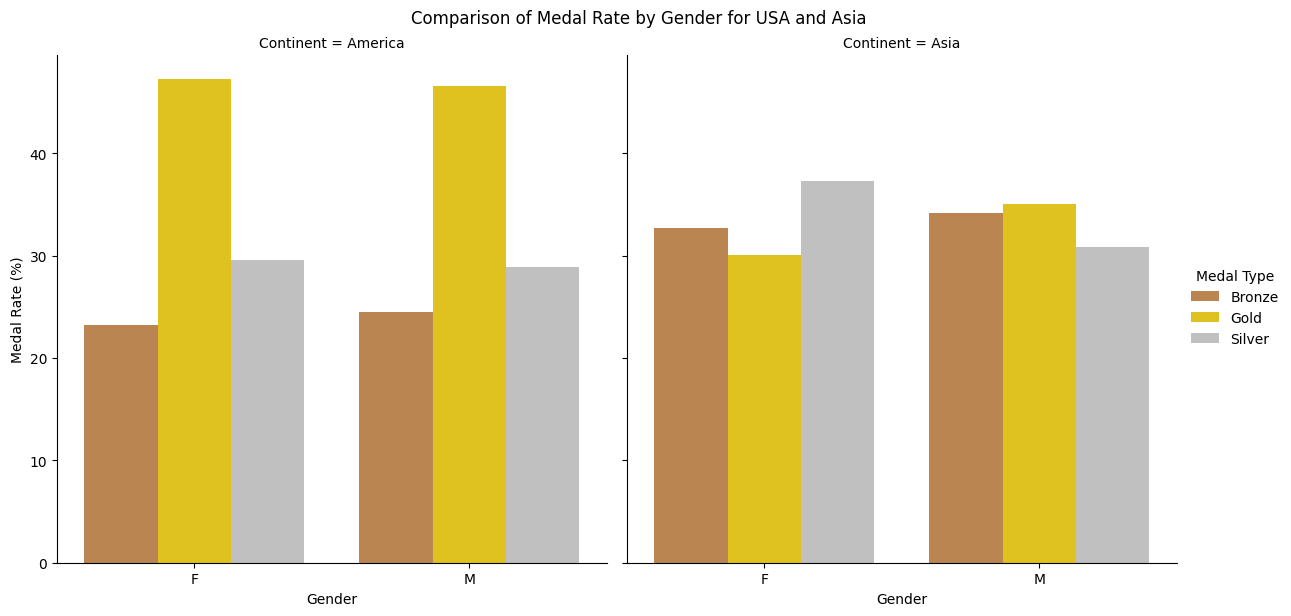

In [ ]:
g = sns.catplot(
    data=df_merged, kind='bar',
    x='Sex', y='Medal_Rate', hue='Medal', col='Continent',       # 대륙을 기준으로 서브플롯을 나눔
    palette=['peru', 'gold', 'silver'], ci=None,
    height=6, aspect=1
)
g.fig.suptitle('Comparison of Medal Rate by Gender for USA and Asia', y=1.02)   #그래프 제목, 축 레이블 설정
g.set_axis_labels('Gender', 'Medal Rate (%)')
g._legend.set_title('Medal Type')

plt.show()

범주형 데이터(성별,메달종류, 대륙)를 시각화 하는데 좋은 catplot(카테고리 플롯)의 막대그래프를 사용하였다.
미국의 남성은 아시아남성보다 금메달 비율이 훨씬 높으며 아시아남성은 메달획득이 고르게 분포되있음
아시아 여성의 메달 획득률은 미국 여성에 비해 더 고르게 분포되어 있으며 금메달 획득 비율이 높음
미국은 금메달에 집중되어 있는 반면, 아시아는 메달의 종류별로 획득률이 좀 더 고르게 분포

결론: 미국의 남여 선수들은 금메달 획득 비율이 비슷하게 높아 경쟁력이 매우높으며 아시아는 균형 잡힌 성과(성별에 따른 메달 획득의 차이적음)를 내고있다.

---

## 올림픽 축구 메달 기록

In [ ]:
# 연도별 남자축구 메달 기록 모으기
football_medalists = fd[(fd['Sport'] == 'Football') & (fd['Medal'].notna())].copy()
football_men_medalists = football_medalists[~football_medalists['Event'].str.contains("Women's")].copy()

# Team 값 수정: 초반의 일부 팀 이름을 국가명으로 대체
team_replacements = {
    'USFSA': 'France',
    'Galt Football Club': "Canada",
    'Univ. of Brussels': 'Belgium',
    'Upton Park FC': 'United Kingdom',
    'Christian Brothers\' College-1': 'United States',
    'St. Rose-2': 'United States',
    'Smyrna': 'Greece',
    'Thessalonki-1': 'Greece'
}

# 복사본에서 컬럼 수정할떄 warning 안띄우기 위해 replace 활용
football_men_medalists['Team'] = football_men_medalists['Team'].replace(team_replacements)

# 연도별 남자축구 팀별 메달 기록 리스트
football_men_medal_teams = football_men_medalists.groupby(['Year', 'Team', 'Medal']).size().reset_index(name='Count')

# Team 칼럼을 Country로 변경하고 'Count' 칼럼 제거
football_men_medal_teams = football_men_medal_teams.rename(columns={'Team': 'Country'}).drop(columns=['Count'])

# 데이터 출력
print(football_men_medal_teams)

    Year         Country   Medal
0   1900         Belgium  Bronze
1   1900          France  Silver
2   1900  United Kingdom    Gold
3   1904          Canada    Gold
4   1904   United States  Bronze
5   1904   United States  Silver
6   1906         Denmark    Gold
7   1906          Greece  Bronze
8   1906          Greece  Silver
9   1908         Denmark  Silver
10  1908   Great Britain    Gold
11  1908     Netherlands  Bronze
12  1912         Denmark  Silver
13  1912   Great Britain    Gold
14  1912     Netherlands  Bronze
15  1920         Belgium    Gold
16  1920     Netherlands  Bronze
17  1920           Spain  Silver
18  1924          Sweden  Bronze
19  1924     Switzerland  Silver
20  1924         Uruguay    Gold
21  1928       Argentina  Silver
22  1928           Italy  Bronze
23  1928         Uruguay    Gold
24  1936         Austria  Silver
25  1936           Italy    Gold
26  1936          Norway  Bronze
27  1948         Denmark  Bronze
28  1948          Sweden    Gold
29  1948  

In [ ]:
# 남자 축구 데이터를 그룹화하여 고유한 연도를 계산
unique_years = football_men_medal_teams['Year'].nunique()

# 올림픽에서 남자 축구 총 몇회 열렸는지 확인
print(f"올림픽에서 남자 축구는 총 {unique_years}회 열렸습니다.")

올림픽에서 남자 축구는 총 27회 열렸습니다.


In [ ]:
# 메달 점수 지표를 만들기 위해 점수 매핑
medal_points = {'Gold': 4, 'Silver': 2, 'Bronze': 1}

# 메달 점수를 계산하여 새로운 칼럼을 추가
football_men_medal_teams['Medal Points'] = football_men_medal_teams['Medal'].map(medal_points)

# 연도별로 팀들의 메달 점수를 집계
team_medal_scores = football_men_medal_teams.groupby(['Country', 'Year'])['Medal Points'].sum().reset_index()

# 1. 역대 가장 메달 점수가 높은 10팀
top_10_all_time = team_medal_scores.groupby('Country')['Medal Points'].sum().sort_values(ascending=False).head(10)

# 2. 첫 10개 대회에서 가장 메달 점수가 높은 10팀
first_10_years = sorted(football_men_medal_teams['Year'].unique())[:10]
top_10_first_10_games = team_medal_scores[team_medal_scores['Year'].isin(first_10_years)].groupby('Country')['Medal Points'].sum().sort_values(ascending=False).head(10)

# 3. 그 다음 10개 대회에서 가장 메달 점수가 높은 10팀
next_10_years = sorted(football_men_medal_teams['Year'].unique())[10:20]
top_10_next_10_games = team_medal_scores[team_medal_scores['Year'].isin(next_10_years)].groupby('Country')['Medal Points'].sum().sort_values(ascending=False).head(10)

# 4. 마지막 7개 대회에서 가장 메달 점수가 높은 7팀
last_7_years = sorted(football_men_medal_teams['Year'].unique())[-7:]
top_7_last_7_games = team_medal_scores[team_medal_scores['Year'].isin(last_7_years)].groupby('Country')['Medal Points'].sum().sort_values(ascending=False).head(7)

# 결과 출력
results = pd.DataFrame({
    'Category': ['Top 10 All Time', 'Top 10 First 10 Games', 'Top 10 Next 10 Games', 'Top 7 Last 7 Games'],
    'Teams': [top_10_all_time.index.tolist(), top_10_first_10_games.index.tolist(), top_10_next_10_games.index.tolist(), top_7_last_7_games.index.tolist()],
    'Points': [top_10_all_time.values.tolist(), top_10_first_10_games.values.tolist(), top_10_next_10_games.values.tolist(), top_7_last_7_games.values.tolist()]
})

# 표 출력
print(results)

                Category                                              Teams  \
0        Top 10 All Time  [Hungary, Argentina, Brazil, Denmark, Soviet U...   
1  Top 10 First 10 Games  [Denmark, Uruguay, Great Britain, Sweden, Belg...   
2   Top 10 Next 10 Games  [Hungary, Soviet Union, Yugoslavia, East Germa...   
3     Top 7 Last 7 Games  [Argentina, Brazil, Nigeria, Spain, Cameroon, ...   

                                 Points  
0  [15, 12, 12, 11, 11, 11, 8, 8, 8, 8]  
1        [9, 8, 8, 5, 5, 5, 4, 4, 3, 3]  
2      [15, 11, 9, 7, 6, 6, 4, 4, 3, 2]  
3                [10, 8, 7, 6, 4, 4, 2]  


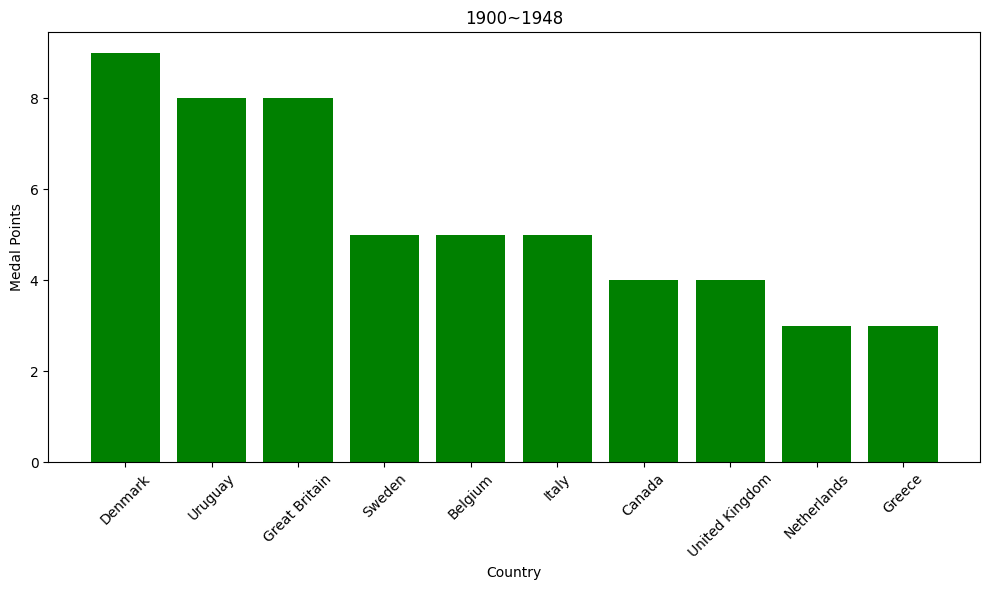

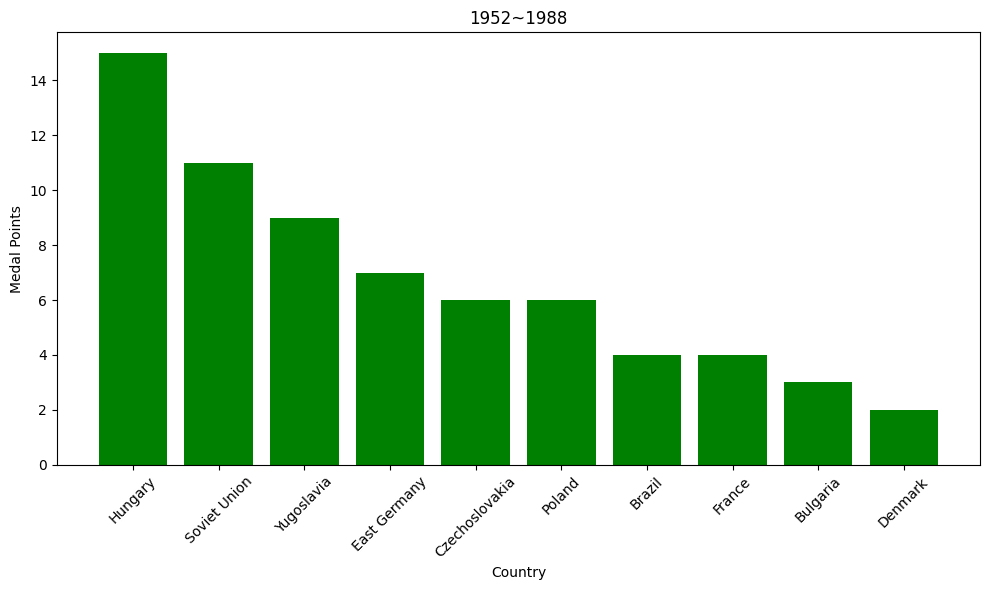

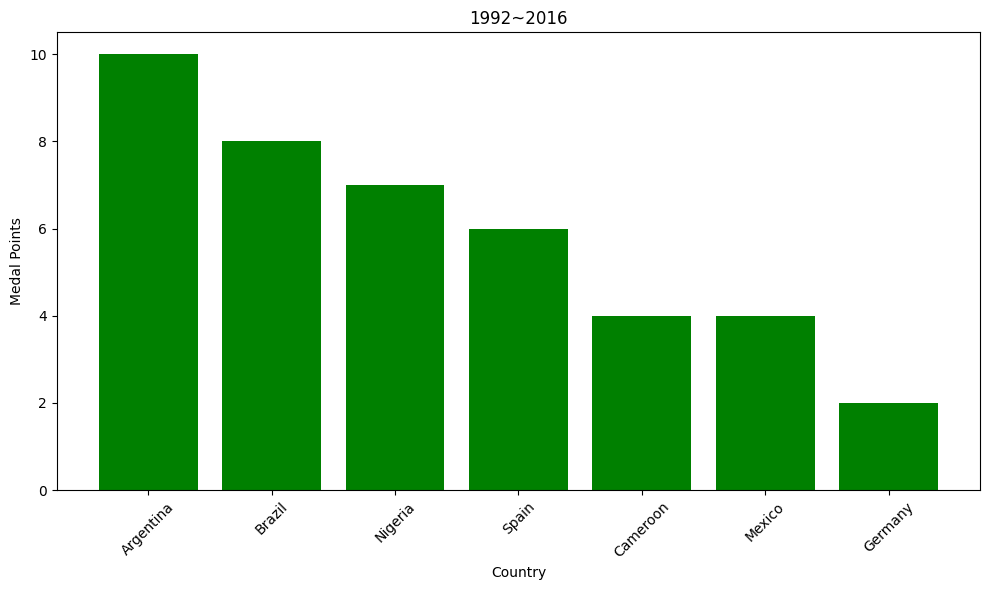

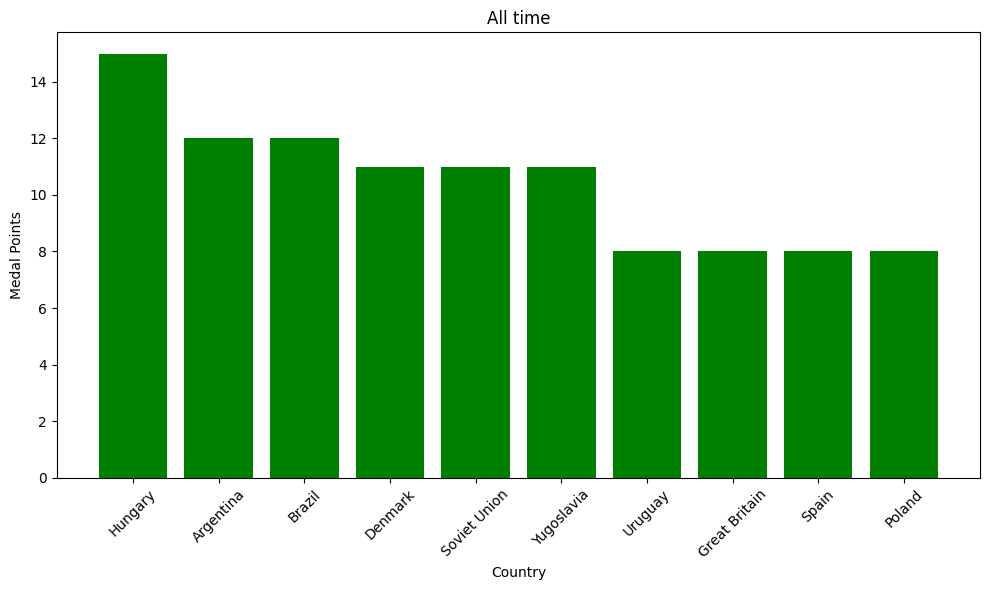

In [ ]:
# 범주 이름 설정
categories = {
    'Top 10 First 10 Games': '1900~1948',
    'Top 10 Next 10 Games': '1952~1988',
    'Top 7 Last 7 Games': '1992~2016',
    'Top 10 All Time': 'All time'
}

# 데이터 준비
data = {
    '1900~1948': (top_10_first_10_games.index.tolist(), top_10_first_10_games.values.tolist()),
    '1952~1988': (top_10_next_10_games.index.tolist(), top_10_next_10_games.values.tolist()),
    '1992~2016': (top_7_last_7_games.index.tolist(), top_7_last_7_games.values.tolist()),
    'All time': (top_10_all_time.index.tolist(), top_10_all_time.values.tolist()),
}

# 그래프 생성
for category, (countries, points) in data.items():
    plt.figure(figsize=(10, 6))
    plt.bar(countries, points, color='green')
    plt.xlabel('Country')
    plt.ylabel('Medal Points')
    plt.title(category)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

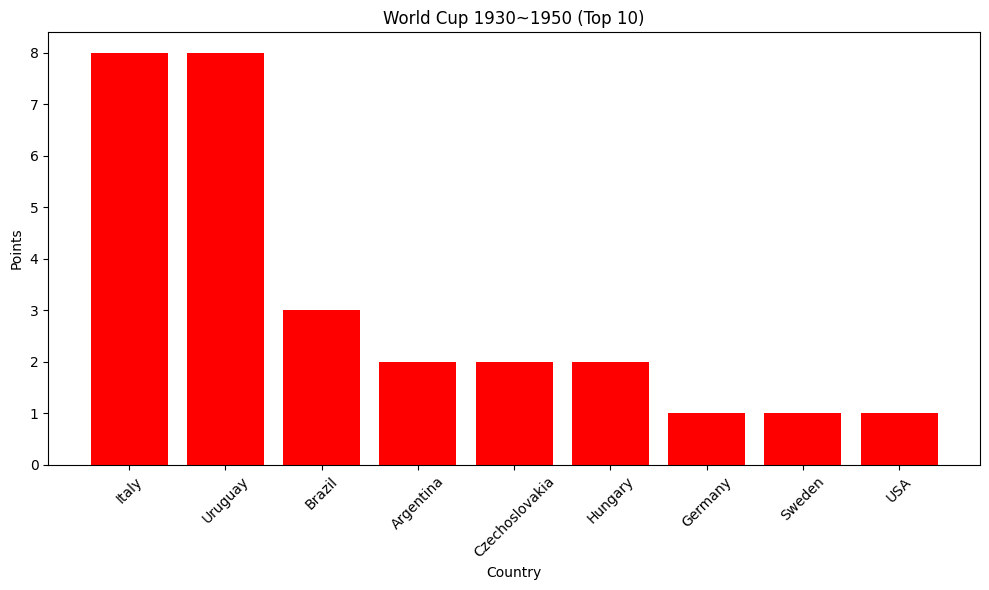

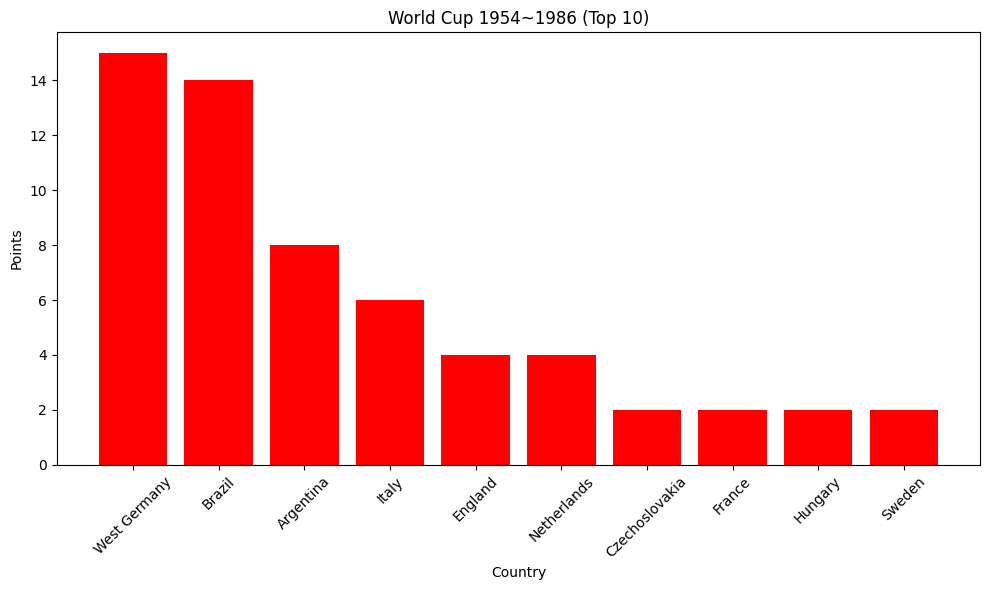

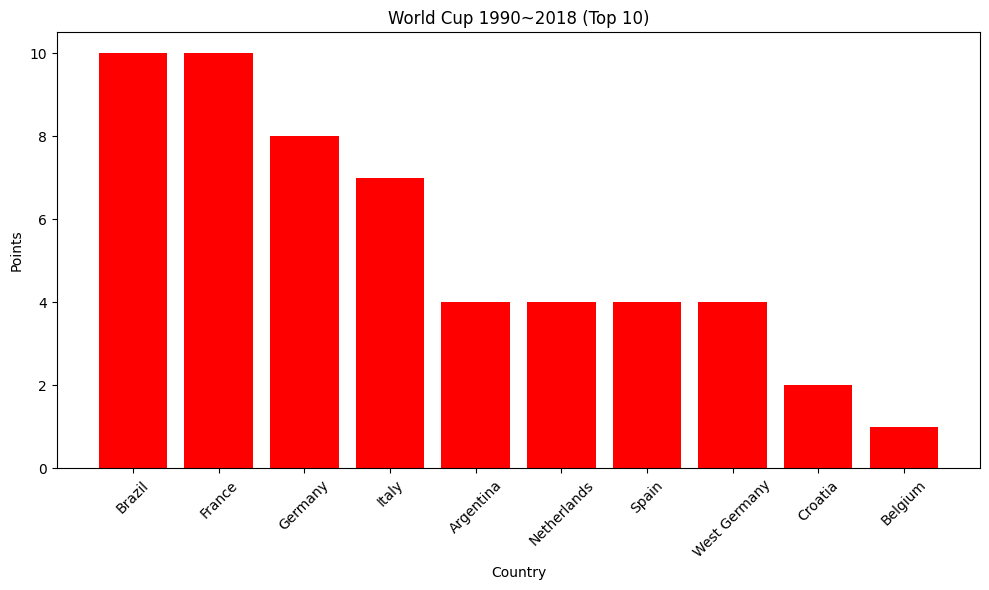

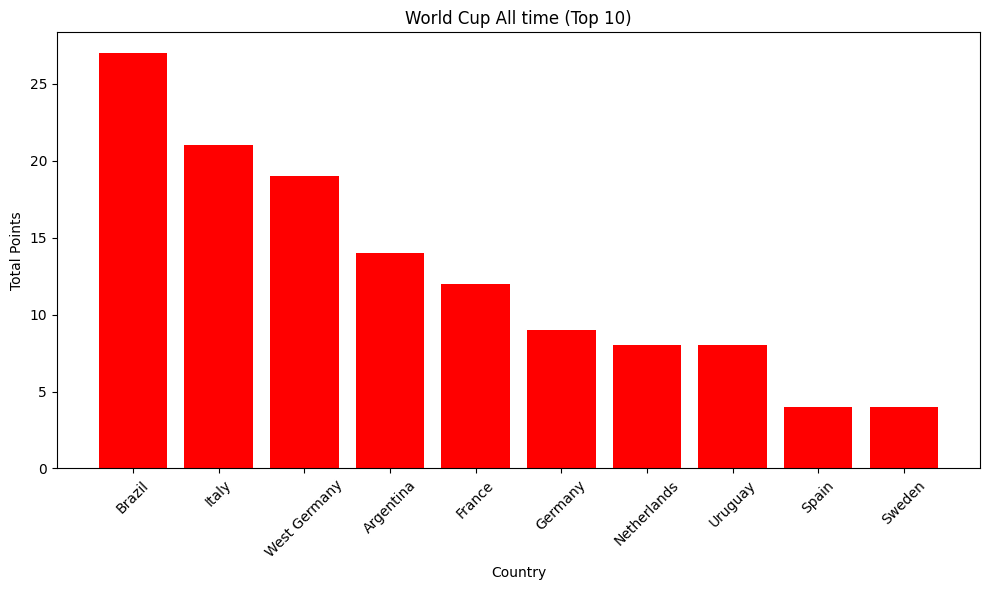

In [ ]:
#비교 위한 월드컵 데이터

# 월드컵 CSV 파일 경로 설정
csv_file_path_wc = os.getenv("HOME") + "/aiffel/workplace/world_cup_football.csv"

# CSV 파일 경로 설정 (파일 경로를 변경하세요)
csv_file_path_wc = 'world_cup_football.csv'

# CSV 파일 불러오기
world_cup_df = pd.read_csv(csv_file_path_wc)

# 메달 점수 부여 (1등 = 4점, 2등 = 2점, 3등 = 1점)
world_cup_df['Winner Points'] = 4
world_cup_df['Runner-up Points'] = 2
world_cup_df['Third Place Points'] = 1

# 1등, 2등, 3등의 점수를 국가별로 합산
winner_scores = world_cup_df.groupby('Winner')['Winner Points'].sum()
runner_up_scores = world_cup_df.groupby('Runner-up')['Runner-up Points'].sum()
third_place_scores = world_cup_df.groupby('Third Place')['Third Place Points'].sum()

# 총 점수 계산 (승자, 준우승, 3위 점수 합산)
total_scores = winner_scores.add(runner_up_scores, fill_value=0).add(third_place_scores, fill_value=0).reset_index()
total_scores.columns = ['Country', 'Total Points']

# 상위 10팀을 추출하는 함수
def top_10_sorted_by_points(scores_df):
    return scores_df.sort_values(by='Points', ascending=False).head(10)

# 1930~1950 (첫번째 그래프)
wc_1930_1950 = world_cup_df[(world_cup_df['Year'] >= 1930) & (world_cup_df['Year'] <= 1950)]
scores_1930_1950 = wc_1930_1950.groupby('Winner')['Winner Points'].sum().add(
                    wc_1930_1950.groupby('Runner-up')['Runner-up Points'].sum(), fill_value=0).add(
                    wc_1930_1950.groupby('Third Place')['Third Place Points'].sum(), fill_value=0).reset_index()
scores_1930_1950.columns = ['Country', 'Points']
scores_1930_1950_top10 = top_10_sorted_by_points(scores_1930_1950)

# 1954~1986 (두번째 그래프)
wc_1954_1986 = world_cup_df[(world_cup_df['Year'] >= 1954) & (world_cup_df['Year'] <= 1986)]
scores_1954_1986 = wc_1954_1986.groupby('Winner')['Winner Points'].sum().add(
                    wc_1954_1986.groupby('Runner-up')['Runner-up Points'].sum(), fill_value=0).add(
                    wc_1954_1986.groupby('Third Place')['Third Place Points'].sum(), fill_value=0).reset_index()
scores_1954_1986.columns = ['Country', 'Points']
scores_1954_1986_top10 = top_10_sorted_by_points(scores_1954_1986)

# 1990~2018 (세번째 그래프)
wc_1990_2018 = world_cup_df[(world_cup_df['Year'] >= 1990) & (world_cup_df['Year'] <= 2018)]
scores_1990_2018 = wc_1990_2018.groupby('Winner')['Winner Points'].sum().add(
                    wc_1990_2018.groupby('Runner-up')['Runner-up Points'].sum(), fill_value=0).add(
                    wc_1990_2018.groupby('Third Place')['Third Place Points'].sum(), fill_value=0).reset_index()
scores_1990_2018.columns = ['Country', 'Points']
scores_1990_2018_top10 = top_10_sorted_by_points(scores_1990_2018)

# All time (네번째 그래프)
scores_all_time_top10 = total_scores.sort_values(by='Total Points', ascending=False).head(10)

# 첫 번째 그래프: World Cup 1930~1950 (상위 10팀)
plt.figure(figsize=(10, 6))
plt.bar(scores_1930_1950_top10['Country'], scores_1930_1950_top10['Points'], color='red')
plt.title('World Cup 1930~1950 (Top 10)')
plt.xlabel('Country')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 두 번째 그래프: World Cup 1954~1986 (상위 10팀)
plt.figure(figsize=(10, 6))
plt.bar(scores_1954_1986_top10['Country'], scores_1954_1986_top10['Points'], color='red')
plt.title('World Cup 1954~1986 (Top 10)')
plt.xlabel('Country')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 세 번째 그래프: World Cup 1990~2018 (상위 10팀)
plt.figure(figsize=(10, 6))
plt.bar(scores_1990_2018_top10['Country'], scores_1990_2018_top10['Points'], color='red')
plt.title('World Cup 1990~2018 (Top 10)')
plt.xlabel('Country')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 네 번째 그래프: World Cup All time (상위 10팀)
plt.figure(figsize=(10, 6))
plt.bar(scores_all_time_top10['Country'], scores_all_time_top10['Total Points'], color='red')
plt.title('World Cup All time (Top 10)')
plt.xlabel('Country')
plt.ylabel('Total Points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 발표 위한 데이터 해석

- 월드컵 데이터와의 차이 나는 이유: 올림픽 선수 출전룰 월드컵이랑 다름(프로 선수 출전 제한, 연령제한 등)
- 첫번째 기간: 덴마크는 아마추어 축구가 강했음(1906년도 올림픽 위기로 아테네중간올림픽 진행, 해당대회에서 우승했고 이는 비공식 기록), 우루과이 강세
- 두번째 기간: 동유럽 강세(공산주의 국가 특성 활용해 프로선수들이 대회 출전)
- 마지막 기간: 나이지리아 아프리카 대륙 첫 우승, 2000년 카메룬 우승
- 월드컵 데이터 특이점: 서독과 독일 점수 합치면 브라질보다 높다.

---

## 연도별 올림픽 종목 변천사

In [ ]:
# 'Season'종류 카운트
data_ad['Season'].value_counts()

,count
Season,
Summer,222552
Winter,48564


In [ ]:
# 필요한 컬럼만 추출 (Year, Season, Sport)
df_sport = data_ad[['Year', 'Season', 'Sport']].drop_duplicates()

# 연도별로 고유한 시즌과 스포츠 목록을 생성
sports_by_year = df_sport.groupby(['Year', 'Season'])['Sport'].apply(set)

# 연도 리스트
years = sorted(sports_by_year.index.get_level_values(0).unique())

# 연도별로 추가된 스포츠와 삭제된 스포츠를 추적
added_sports = {}
removed_sports = {}

for i in range(1, len(years)):
    current_year = years[i]
    previous_year = years[i - 1]

    # 두 시즌을 각각 비교
    for season in ['Summer', 'Winter']:
        if (previous_year, season) in sports_by_year and (current_year, season) in sports_by_year:
            current_sports = sports_by_year[(current_year, season)]
            previous_sports = sports_by_year[(previous_year, season)]

            # 해당 연도에 추가된 스포츠
            added = current_sports - previous_sports
            if added:
                added_sports[(current_year, season)] = added

            # 해당 연도에 삭제된 스포츠
            removed = previous_sports - current_sports
            if removed:
                removed_sports[(current_year, season)] = removed

# 결과 출력
print("추가된 스포츠:")
for year_season, sports in added_sports.items():
    print(f"Year: {year_season[0]}, Season: {year_season[1]}, Added Sports: {sports}")

print("\n삭제된 스포츠:")
for year_season, sports in removed_sports.items():
    print(f"Year: {year_season[0]}, Season: {year_season[1]}, Removed Sports: {sports}")

추가된 스포츠:
Year: 1900, Season: Summer, Added Sports: {'Polo', 'Golf', 'Croquet', 'Rugby', 'Football', 'Equestrianism', 'Cricket', 'Basque Pelota', 'Sailing', 'Water Polo', 'Rowing', 'Archery', 'Tug-Of-War'}
Year: 1904, Season: Summer, Added Sports: {'Diving', 'Wrestling', 'Roque', 'Lacrosse', 'Boxing', 'Weightlifting'}
Year: 1906, Season: Summer, Added Sports: {'Shooting'}
Year: 1908, Season: Summer, Added Sports: {'Polo', 'Hockey', 'Rugby', 'Motorboating', 'Lacrosse', 'Boxing', 'Sailing', 'Water Polo', 'Archery', 'Racquets', 'Jeu De Paume', 'Figure Skating'}
Year: 1912, Season: Summer, Added Sports: {'Modern Pentathlon', 'Art Competitions', 'Equestrianism'}
Year: 1920, Season: Summer, Added Sports: {'Polo', 'Ice Hockey', 'Rugby', 'Hockey', 'Boxing', 'Archery', 'Figure Skating', 'Weightlifting'}
Year: 1928, Season: Summer, Added Sports: {'Hockey'}
Year: 1928, Season: Winter, Added Sports: {'Skeleton'}
Year: 1932, Season: Summer, Added Sports: {'Alpinism', 'Shooting'}
Year: 1936, Season: 

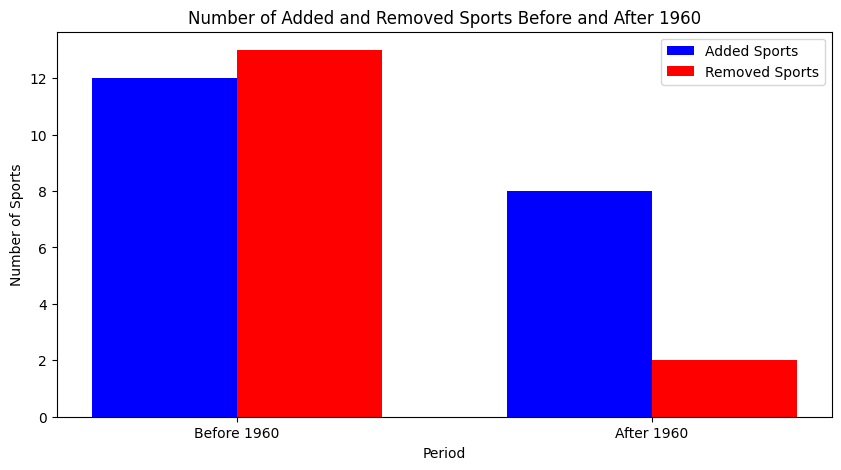

In [ ]:
# 1960년 이전과 이후로 분리
added_before_1960 = {year_season: sports for year_season, sports in added_sports.items() if year_season[0] < 1960}
added_after_1960 = {year_season: sports for year_season, sports in added_sports.items() if year_season[0] >= 1960}
removed_before_1960 = {year_season: sports for year_season, sports in removed_sports.items() if year_season[0] < 1960}
removed_after_1960 = {year_season: sports for year_season, sports in removed_sports.items() if year_season[0] >= 1960}

# 각 그룹의 개수 계산
added_count = [len(added_before_1960), len(added_after_1960)]
removed_count = [len(removed_before_1960), len(removed_after_1960)]

# 그래프 시각화
labels = ['Before 1960', 'After 1960']
x = range(len(labels))

fig, ax = plt.subplots(figsize=(10, 5))

bar_width = 0.35
ax.bar(x, added_count, width=bar_width, label='Added Sports', color='b', align='center')
ax.bar([p + bar_width for p in x], removed_count, width=bar_width, label='Removed Sports', color='r', align='center')

ax.set_xlabel('Period')
ax.set_ylabel('Number of Sports')
ax.set_title('Number of Added and Removed Sports Before and After 1960')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()

### 올림픽 스포츠 발전 양상:
1. 올림픽 프로그램의 변화
초기 스포츠 프로그램의 변동성: 초창기 올림픽(1900년대)에는 많은 스포츠들이 추가되거나 삭제되었습니다. 이는 당시 올림픽 프로그램이 아직 정착되지 않았고, 시범 경기 또는 다양한 종목을 실험적으로 채택했음을 보여줍니다. 예를 들어, 1900년에는 한 해에만 13개의 스포츠가 추가되었고, 1904년에도 상당한 수의 스포츠가 추가되었습니다. 반면에, 몇몇 스포츠는 짧은 시간 내에 삭제되기도 했습니다.
안정화된 현대 올림픽: 1960년대 이후 올림픽 프로그램은 상대적으로 더 안정적이 되었습니다. 초기에는 종목의 추가 및 삭제가 빈번했으나, 이후에는 주기적으로 새로운 스포츠를 추가하거나 일부 종목을 제외하는 방식으로 변화가 일어났습니다. 예를 들어, 1992년부터는 새로운 종목들이 주로 기술 발전 또는 대중의 관심에 따라 추가되었음을 볼 수 있습니다(예: 야구, 배드민턴, 프리스타일 스키).
2. 동계 및 하계 올림픽의 분리
1992년 이후 동계 올림픽과 하계 올림픽이 다른 해에 열리면서, 동계와 하계 스포츠의 변화 패턴이 각각 독립적으로 나타났습니다. 이로 인해 동계 올림픽에서는 프리스타일 스키, 쇼트트랙 등의 새로운 동계 스포츠가 등장했고, 하계 올림픽에서는 배드민턴, 야구, 테니스 등이 추가되었습니다.
3. 스포츠의 재도입 및 삭제
특정 스포츠가 한 번 올림픽에서 제외되었다가 다시 재도입된 경우도 많습니다. 예를 들어, 럭비는 1900년, 1908년, 1920년에 포함되었다가 한동안 제외되었고, 이후 다시 채택되었습니다. 스켈레톤(Skeleton)은 1928년과 1948년에 추가되었으나 삭제되었다가 이후 2002년에 다시 추가되었습니다. 이러한 재도입은 해당 스포츠에 대한 대중적 관심이나 국제 경기력의 향상과 관련이 있을 수 있습니다.

---

# 회고
---

- 강민구 : 하나의 데이터로 여러가지 분석이 가능하다는 것을 직접 확인해보는 계기가 되었고, 목적과 적용에 따라 데이터 접근의 출발점이 결정되어야 한다는것을 깨닫는 시간이었다  
- 이익현 : lms를 보고 실습하다 직접 처음부터 분석을 하려니 어려웠지만 다른거도 참고해가면서 해결했고 복습이 되서 좋았던거 같다 그래프를 구현하는 부분이 어렵다고 느꼈다.  
- 조계현: 팀으로 같이 작업해볼 수 있어서 좋았다. 데이터를 다룰때 전처리등에 대한 감이 아직은 부족해서 더 많이 다뤄봐야 될 것 같다.  
- 강윤제: 같은 팀으로 코드 작업을 처음 진행 하다보니 전체적으론 비슷한 순서로 진행되지만 어떤식으로 진행해야 될지를 몰라 막막하였고 전처리 과정에서 수많은 오류와 결과값의 차이들로 인하여 정신적으로 고통스러웠다. 하지만 팀원들과 소통해서 해결되는 부분도 있어서 좋은점도 있었다. 앞으로 아이펠 과정을 통해 팀으로 문제를 해결하는 능력이 오르도록, 그리고 내 개인의 실력도 높이도록 노력해야 되겠다.